## Codebase for bank marketing dataset classification using superlearner techniques

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from dataset import get_data

df = get_data()
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

Variant 1:
Base = DT, LR, SVM, RF, XGBoost
Meta Learner = LR

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from superlearner import SuperLearner
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from preprocessing import *

X_resampled, X_test, y_resampled, y_test, encoders, scalers = preprocessing_pipeline(df)

base = [
    LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42),
    RandomForestClassifier(random_state=42, n_jobs=-1),
    DecisionTreeClassifier(random_state=42),
    XGBClassifier(random_state=42, n_jobs=-1),
    SVC(probability=True, random_state=42)
]

meta_learner = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

sl = SuperLearner(
    base_learners=base, meta_learner=meta_learner, n_folds=5
)

sl.fit(X_resampled, y_resampled)

y_pred = sl.predict(X_test)

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()

print(f"Accuracy: {acc:.4f}")
print(f"Recall: {rec:.4f}")
print(f"Precision: {prec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

Accuracy: 0.9100
Recall: 0.6315
Precision: 0.5947
F1 Score: 0.6125
Confusion Matrix: TN=879, FP=513, FN=599, TP=10366


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from superlearner import SuperLearner
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from preprocessing import *

X_resampled, X_test, y_resampled, y_test, encoders, scalers = preprocessing_pipeline(df)

base = [
    LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42, n_jobs=-1),
    RandomForestClassifier(random_state=42, n_jobs=-1),
    DecisionTreeClassifier(random_state=42),
    XGBClassifier(random_state=42, n_jobs=-1),
    SVC(probability=True, random_state=42)
]

meta_learner = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

sl = SuperLearner(
    base_learners=base, meta_learner=meta_learner, n_folds=10
)

sl.fit(X_resampled, y_resampled)

y_pred = sl.predict(X_test)

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()

print(f"Accuracy: {acc:.4f}")
print(f"Recall: {rec:.4f}")
print(f"Precision: {prec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

Accuracy: 0.9109
Recall: 0.6200
Precision: 0.6014
F1 Score: 0.6105
Confusion Matrix: TN=863, FP=529, FN=572, TP=10393


Variant 2

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from superlearner import SuperLearner
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from preprocessing import *

X_resampled, X_test, y_resampled, y_test, encoders, scalers = preprocessing_pipeline(df)

base = [
    LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42),
    RandomForestClassifier(random_state=42, n_jobs=-1),
    DecisionTreeClassifier(random_state=42),
    XGBClassifier(random_state=42, n_jobs=-1),
    SVC(probability=True, random_state=42)
]

meta_learner = DecisionTreeClassifier(random_state=42)

sl = SuperLearner(
    base_learners=base, meta_learner=meta_learner, n_folds=5
)

sl.fit(X_resampled, y_resampled)

y_pred = sl.predict(X_test)

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()

print(f"Accuracy: {acc:.4f}")
print(f"Recall: {rec:.4f}")
print(f"Precision: {prec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

Accuracy: 0.8950
Recall: 0.4921
Precision: 0.5373
F1 Score: 0.5137
Confusion Matrix: TN=685, FP=707, FN=590, TP=10375


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from superlearner import SuperLearner
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from preprocessing import *

X_resampled, X_test, y_resampled, y_test, encoders, scalers = preprocessing_pipeline(df)

base = [
    RandomForestClassifier(random_state=42, n_jobs=-1),
    DecisionTreeClassifier(random_state=42),
    XGBClassifier(random_state=42, n_jobs=-1),
    SVC(probability=True, random_state=42),
    MLPClassifier(max_iter=1000, random_state=42)
]

meta_learner = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

sl = SuperLearner(
    base_learners=base, meta_learner=meta_learner, n_folds=5
)

sl.fit(X_resampled, y_resampled)

y_pred = sl.predict(X_test)

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()

print(f"Accuracy: {acc:.4f}")
print(f"Recall: {rec:.4f}")
print(f"Precision: {prec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

Accuracy: 0.9097
Recall: 0.6257
Precision: 0.5941
F1 Score: 0.6095
Confusion Matrix: TN=871, FP=521, FN=595, TP=10370


In [4]:
#Optimized hyperparameter on base model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from superlearner import SuperLearner
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from preprocessing import *

X_resampled, X_test, y_resampled, y_test, encoders, scalers = preprocessing_pipeline(df)

base = [
    LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42, n_jobs=-1),
    RandomForestClassifier(n_estimators=500, max_features='sqrt', random_state=42, n_jobs=-1),
    DecisionTreeClassifier(max_depth=10, random_state=42),
    XGBClassifier(learning_rate= 0.1, n_estimators= 500, subsample= 0.5, random_state=42, n_jobs=-1),
    MLPClassifier(max_iter=1000, random_state=42)
]

meta_learner = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

sl = SuperLearner(
    base_learners=base, meta_learner=meta_learner, n_folds=10
)

sl.fit(X_resampled, y_resampled)

y_pred = sl.predict(X_test)

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()

print(f"Accuracy: {acc:.4f}")
print(f"Recall: {rec:.4f}")
print(f"Precision: {prec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

Accuracy: 0.9110
Recall: 0.6049
Precision: 0.6049
F1 Score: 0.6049
Confusion Matrix: TN=842, FP=550, FN=550, TP=10415


In [5]:
#Optimized hyperparameter on base model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from superlearner import SuperLearner
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from preprocessing import *

X_resampled, X_test, y_resampled, y_test, encoders, scalers = preprocessing_pipeline(df)

base = [
    LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42, n_jobs=-1),
    RandomForestClassifier(n_estimators=500, max_features='sqrt', random_state=42, n_jobs=-1),
    DecisionTreeClassifier(max_depth=10, random_state=42),
    XGBClassifier(learning_rate= 0.1, n_estimators= 500, subsample= 0.5, random_state=42, n_jobs=-1),
    MLPClassifier(max_iter=1000, random_state=42)
]

meta_learner = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

sl = SuperLearner(
    base_learners=base, meta_learner=meta_learner, n_folds=5
)

sl.fit(X_resampled, y_resampled)

y_pred = sl.predict(X_test)

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()

print(f"Accuracy: {acc:.4f}")
print(f"Recall: {rec:.4f}")
print(f"Precision: {prec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

Accuracy: 0.9098
Recall: 0.6128
Precision: 0.5973
F1 Score: 0.6050
Confusion Matrix: TN=853, FP=539, FN=575, TP=10390


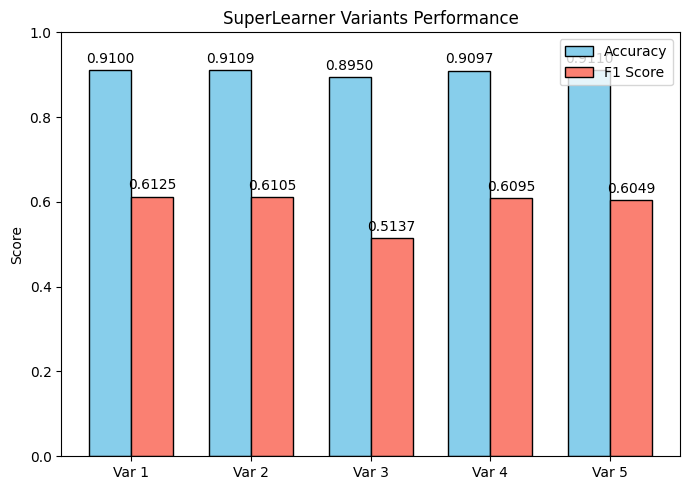

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the two variants
variants = ['Var 1', 'Var 2', 'Var 3', 'Var 4', 'Var 5']
accuracy = [0.9100, 0.9109, 0.8950, 0.9097, 0.9110]
f1_score = [0.6125, 0.6105, 0.5137, 0.6095, 0.6049]

x = np.arange(len(variants))  # label locations
width = 0.35  # width of the bars

plt.figure(figsize=(7, 5))
bars1 = plt.bar(x - width/2, accuracy, width, label='Accuracy', color='skyblue', edgecolor='black')
bars2 = plt.bar(x + width/2, f1_score, width, label='F1 Score', color='salmon', edgecolor='black')

plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('SuperLearner Variants Performance')
plt.xticks(x, variants)
plt.legend()

# Add value labels on top of each bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.4f}',
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

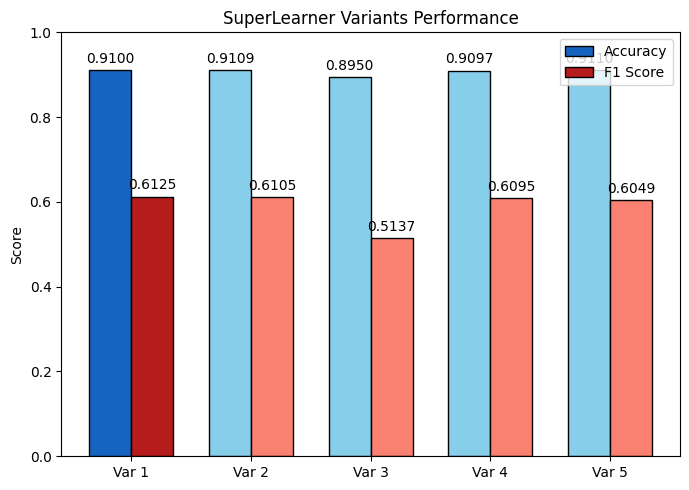

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the two variants
variants = ['Var 1', 'Var 2', 'Var 3', 'Var 4', 'Var 5']
accuracy = [0.9100, 0.9109, 0.8950, 0.9097, 0.9110]
f1_score = [0.6125, 0.6105, 0.5137, 0.6095, 0.6049]

x = np.arange(len(variants))  # label locations
width = 0.35  # width of the bars

plt.figure(figsize=(7, 5))
# Set colors: darker for Var 1, lighter for others
acc_colors = ['#1565c0'] + ['skyblue'] * (len(variants)-1)
f1_colors = ['#b71c1c'] + ['salmon'] * (len(variants)-1)

bars1 = plt.bar(x - width/2, accuracy, width, label='Accuracy', color=acc_colors, edgecolor='black')
bars2 = plt.bar(x + width/2, f1_score, width, label='F1 Score', color=f1_colors, edgecolor='black')

plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('SuperLearner Variants Performance')
plt.xticks(x, variants)
plt.legend()

# Add value labels on top of each bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.4f}',
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()